In [1]:
import pandas as pd
import numpy as np
from scipy.signal import convolve2d
import seaborn as sns
import matplotlib.pyplot as plt
from openpyxl import load_workbook

In [2]:
file_path = 'C:/Users/19874/OneDrive/Matrix_A.xlsx' 

data_df = pd.read_excel(file_path, sheet_name='Data', header=None)
filter_df = pd.read_excel(file_path, sheet_name='Filter', header=None)

In [3]:
data_matrix = data_df.select_dtypes(include=[np.number]).to_numpy()
filter_matrix = filter_df.select_dtypes(include=[np.number]).to_numpy()
result = convolve2d(data_matrix, filter_matrix, mode='valid')
# This step converts the matrix to numpy format

In [4]:
threshold = np.sum(filter_matrix)
pattern_detected = result == threshold

highlighted_matrix = data_matrix.copy()
filter_rows, filter_cols = filter_matrix.shape

In [5]:
threshold = np.sum(filter_matrix)
pattern_detected = result == threshold

highlighted_matrix = data_matrix.copy()
filter_rows, filter_cols = filter_matrix.shape

In [6]:
for i in range(pattern_detected.shape[0]):
    for j in range(pattern_detected.shape[1]):
        if pattern_detected[i, j]:
            highlighted_matrix[i:i+filter_rows, j:j+filter_cols] += 4
# if patterned detected, the matrix is being highlighted

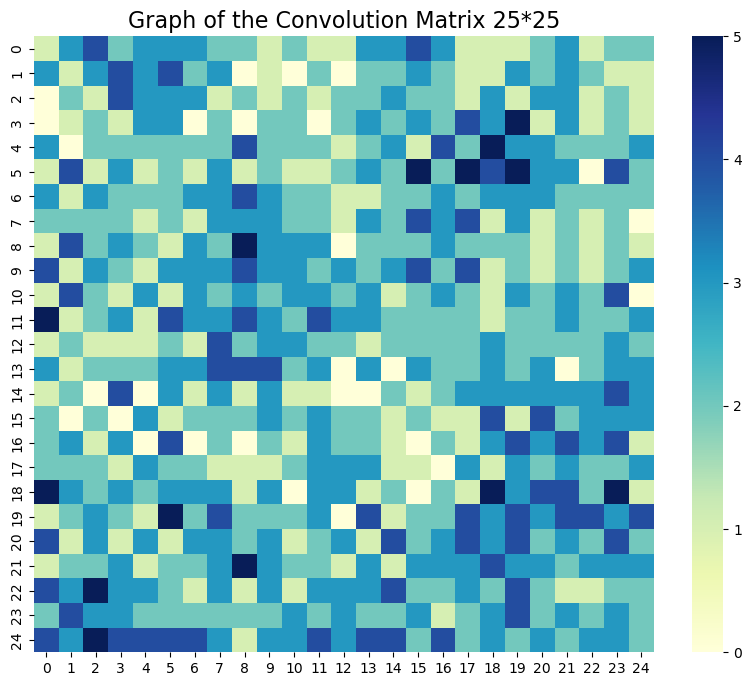

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(result, annot=False, cmap='YlGnBu', cbar=True)
plt.title('Graph of the Convolution Matrix 25*25', fontsize=16)
plt.savefig('Convolution_Result.pdf', format='pdf')
plt.show()
# Dark square shows that there is a detected pattern

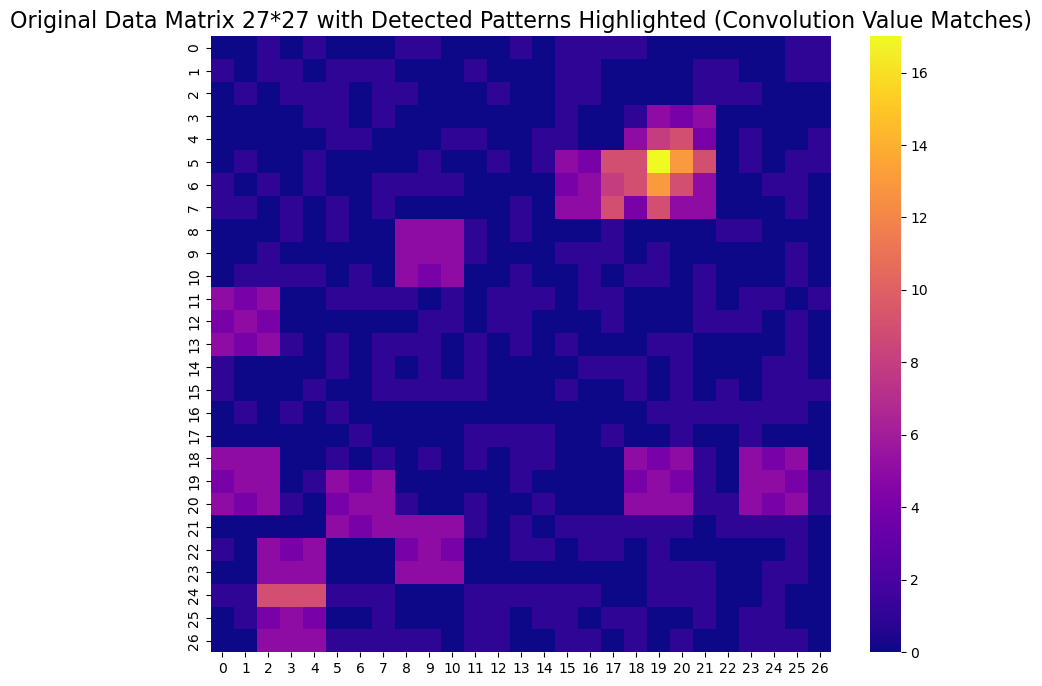

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(highlighted_matrix, annot=False, cmap="plasma", cbar=True)  # colors: 'coolwarm', 'magma', 'plasma', 'cubehelix'
plt.title('Original Data Matrix 27*27 with Detected Patterns Highlighted (Convolution Value Matches)', fontsize=16)
plt.savefig('Highlighted_Pattern_Seaborn.pdf', format='pdf')
plt.show()

# The above map only shows the areas where the convolution value matches the threshold. The next step detects the precise pattern match.

In [9]:
filter_rows, filter_cols = filter_matrix.shape
precise_pattern_detected = np.zeros((data_matrix.shape[0] - filter_rows + 1, data_matrix.shape[1] - filter_cols + 1), dtype=bool)

for i in range(data_matrix.shape[0] - filter_rows + 1):
    for j in range(data_matrix.shape[1] - filter_cols + 1):
        submatrix = data_matrix[i:i+filter_rows, j:j+filter_cols]
        numerator = np.sum(filter_matrix * submatrix)
        denominator = (
            np.sqrt(np.sum(filter_matrix**2)) * np.sqrt(np.sum(submatrix**2))
        )
        match_score = numerator / denominator if denominator != 0 else 0
        
        if np.isclose(match_score, 1.0): 
            precise_pattern_detected[i, j] = True

highlighted_output = np.array(data_matrix, dtype=str)  


highlight_color = '\033[43m' 
reset_color = '\033[0m'  
for i in range(precise_pattern_detected.shape[0]):
    for j in range(precise_pattern_detected.shape[1]):
        if precise_pattern_detected[i, j]:
            for row in range(i, i + filter_rows):
                for col in range(j, j + filter_cols):
                    highlighted_output[row, col] = f"{highlight_color}{data_matrix[row, col]}{reset_color}"

print("Highlighted Matrix with Precise Pattern Matches:")
for row in highlighted_output:
    print(' '.join(row))


Highlighted Matrix with Precise Pattern Matches:
0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1
1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1
0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0
0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0
0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1
0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1
1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0
1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0
0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0
0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0
0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1
0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0
1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0
1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0
1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1
0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0
0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0